# Path Configuration

In [3]:
import os
import sys
import argparse

root = "../"*3
src_path = os.path.join(root, "kyoka")
sample_path = os.path.join(root, "sample")
sys.path.append(root)
sys.path.append(src_path)
sys.path.append(sample_path)

import logging as log
log.basicConfig(format='[%(levelname)s] %(message)s', level=log.DEBUG)

from kyoka.algorithm.montecarlo.montecarlo import MonteCarlo
from kyoka.algorithm.td_learning.sarsa import Sarsa
from kyoka.algorithm.td_learning.q_learning import QLearning
from kyoka.algorithm.td_learning.sarsa_lambda import SarsaLambda
from kyoka.algorithm.td_learning.q_lambda import QLambda

from kyoka.policy.epsilon_greedy_policy import EpsilonGreedyPolicy
from kyoka.finish_rule.watch_iteration_count import WatchIterationCount

from sample.maze.maze_domain import MazeDomain
from sample.maze.maze_table_value_function import MazeTableValueFunction
from sample.maze.maze_helper import MazeHelper
from sample.maze.maze_performance_logger import MazePerformanceLogger
from sample.maze.maze_transformer import MazeTransformer

# Setup Global Item for Performance Test

In [4]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

maze_file_path = lambda maze_type: "../script/%s.txt" % maze_type
transform_file_path = lambda maze_type: "../script/%s_transformed.txt" % maze_type

def gen_callbacks(maze_type, transform_timing):
    callbacks = [MazePerformanceLogger()]
    if maze_type in ["blocking", "shortcut"]:
        transfomer = MazeTransformer()
        transfomer.set_transformation(transform_timing, transform_file_path(maze_type))
        callbacks.append(transfomer)
    return callbacks

def run_performance_test(maze_type, rl_algo, epsilon, test_length, transform_timing):
    watch_iteration = WatchIterationCount(target_count=test_length, log_interval=1000)
    finish_rules = [watch_iteration]
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    value_func = MazeTableValueFunction(domain.get_maze_shape())
    value_func.setUp()
    policy = EpsilonGreedyPolicy(eps=epsilon)
    callbacks = gen_callbacks(maze_type, transform_timing)
    [rl_algo.set_gpi_callback(callback) for callback in callbacks]
    rl_algo.GPI(domain, policy, value_func, finish_rules)
    return callbacks[0].step_log, callbacks[0].policy_log

def visualize_maze(maze_type, transform_timing):
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    print "maze shape ( height=%d, width=%d )" % domain.get_maze_shape()
    print
    print "Initial maze shape is ..."
    print
    print MazeHelper.visualize_maze(domain.maze)
    print
    print "After %d iteration, maze transforms into ..." % transform_timing
    print
    domain.read_maze(transform_file_path(maze_type))
    print MazeHelper.visualize_maze(domain.maze)

def visualize_step_transition(step_log):
    print "minimum step => %d" % min(step_log)
    plt.plot(step_log, label="step")
    plt.xlabel("GPI iteration")
    plt.ylabel("step")
    plt.show()
    
def visualize_policy_transition(step_log, policy_log, sampling_interval):
    sampled_log = [(item[0]+1, item[1]) for item in enumerate(policy_log) if (item[0]+1)%sampling_interval==0]
    for iteration, log in sampled_log:
        minimum_step = min(step_log[iteration-sampling_interval:iteration])
        print "After %d th iteration (minimum step => %d)" % (iteration, minimum_step)
        print log
        print

# Shortcut Maze

In [9]:
MAZE_TYPE = "shortcut"
TEST_LENGTH = 500
TRANSFORM_TIMING = 50
visualize_maze(MAZE_TYPE, TRANSFORM_TIMING)

maze shape ( height=6, width=9 )

Initial maze shape is ...

--------G
---------
---------
-XXXXXXXX
---------
---S-----

After 50 iteration, maze transforms into ...

--------G
---------
---------
-XXXXXXX-
---------
---S-----


## Sarsa

minimum step => 16


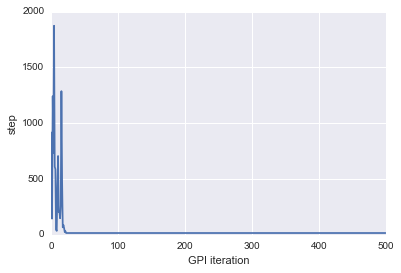

After 50 th iteration (minimum step => 16)
-v-->v>>G
v>>>>>>>^
>^^>^^^>^
^--------
^<v------
^<<<<----

After 100 th iteration (minimum step => 16)
-v-->v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v------
^<<<<----

After 150 th iteration (minimum step => 16)
-v->>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 200 th iteration (minimum step => 16)
-v-v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 250 th iteration (minimum step => 16)
-v<v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 300 th iteration (minimum step => 16)
-v<v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 350 th iteration (minimum step => 16)
-v<v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 400 th iteration (minimum step => 16)
-v<v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 450 th iteration (minimum step => 16)
-v<v>v>>G
v>>>>>>>^
>^^>^^>>^
^-------^
^<v<-----
^<<<<----

After 500 th iteration (minimum step => 16)
-v<v>v>>G
v>

In [21]:
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


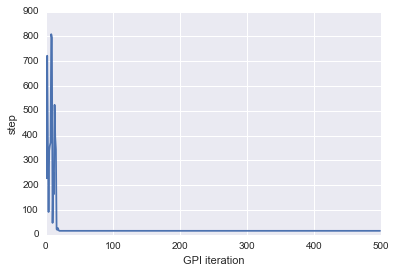

After 50 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^<<---^
^--------
^<<v-----
^<^<<<---

After 100 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^^<^->^
^--------
^<<<-----
^<^<<<---

After 150 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^^<^^>^
^--------
^<<<-v---
^<^<<<---

After 200 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^^<^^>^
^-------^
^<<<>vv--
^<^<<<<--

After 250 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^^<^^>^
^-------^
^<<<>vv--
^<^<<<<--

After 300 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>>^^<^^>^
^-------^
^<<<>vv--
^<^<<<<--

After 350 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>>^^<^^>^
^-------^
^<<<>vv--
^<^<<<<--

After 400 th iteration (minimum step => 16)
>vv>>>>>G
>>>>^^^>^
>^^^<^^>^
^-------^
^<<<>vv--
^<^<<<<--

After 450 th iteration (minimum step => 16)
>vv>>>>>G
>>>>>^^>^
>>^^<^^>^
^-------^
^<<<<vv--
^<^<<<<--

After 500 th iteration (minimum step => 16)
>vv>>>>>G
>>

In [11]:
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


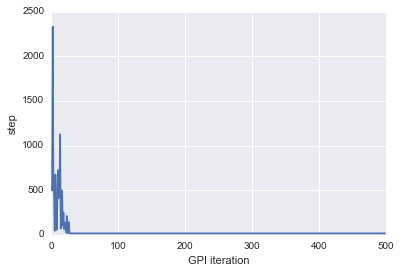

After 50 th iteration (minimum step => 16)
>>>>>>>>G
>>>^>^^^^
>^>^^^^^^
^--------
^<<<<--v-
^<<^<<<<-

After 100 th iteration (minimum step => 16)
>>>>>>>>G
>^>^>^^^^
>>>^^^^^^
^--------
^<<<<<vv-
^^<^<<<<-

After 150 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>>^^^^^^^
^-------^
^<<<<<<v-
^<^<<<<<<

After 200 th iteration (minimum step => 16)
>>>>>>>>G
>>>>^^^^^
>>^^^^^^^
^-------^
^<<<<<<<-
^^^^<<<<<

After 250 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>^^^^
>>^^^^^^^
^-------^
^<<<<<<<-
^^^^<<<<<

After 300 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>^>^^^^^^
^-------^
^<<<<<<<<
^^<<<<<<<

After 350 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>^^^
>^^^^>^^^
^-------^
^<<<<<<<^
^<<<<<<<<

After 400 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>^^
>>>>>^^^^
^-------^
^<<<<<<>^
^^<<<<<^<

After 450 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>^^
^>>>>^>^^
^-------^
^<<<<<<>^
^^<<<<<^<

After 500 th iteration (minimum step => 16)
>>>>>>>>G
>>

In [12]:
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

# QLearning

minimum step => 16


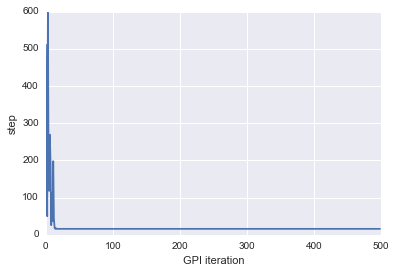

After 50 th iteration (minimum step => 16)
>>>>>>>>G
^^->^^<-^
^^-------
^--------
^<v------
^<<<-----

After 100 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 150 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 200 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 250 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 300 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 350 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^---^--^
^--------
^<<<-----
^<<<<----

After 400 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^^--^--^
^--------
^<<<-----
^<<<<----

After 450 th iteration (minimum step => 16)
>>>>>>>>G
^^>>^^<<^
^^^--^--^
^--------
^<<<-----
^<<<<----

After 500 th iteration (minimum step => 16)
>>>>>>>>G
^^

In [13]:
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


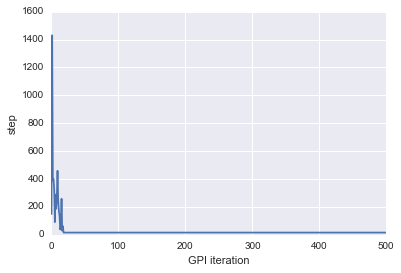

After 50 th iteration (minimum step => 16)
v<--->>>G
vvvvvv>^^
>>>>>>^^^
^--------
^<<v<----
^<^<<----

After 100 th iteration (minimum step => 16)
v<v-v>>>G
vvvvvv>^^
>>>>>>^^^
^--------
^<<<<----
^<^<<----

After 150 th iteration (minimum step => 16)
v<v-v>>>G
vvvvvv>^^
>>>>>>^^^
^--------
^<<<<----
^<^<<----

After 200 th iteration (minimum step => 16)
v<v<v>>>G
vvvvvv>^^
>>>>>>^^^
^--------
^<<<<<---
^<^<<----

After 250 th iteration (minimum step => 16)
v<v<v>>>G
vvvvvv>^^
>>>>>>^^^
^-------^
^<<<<<---
^<^<<----

After 300 th iteration (minimum step => 16)
v<v<v>>>G
vvvvvv>^^
>>>>>>^^^
^-------^
^<<<<<<--
^<^<<^---

After 350 th iteration (minimum step => 16)
v<v<v>>>G
vvvvvv>^^
>>>>>>^^^
^-------^
^<<<<<<--
^<^<<^---

After 400 th iteration (minimum step => 16)
v<v<v>>>G
vvvvvv>^^
>>>>>>^^^
^-------^
^<<<<<<--
^<^<<^---

After 450 th iteration (minimum step => 16)
v>v>v>>>G
vvvvvv>^^
>>>>>>^^^
^-------^
^<<<<<<--
^<^<<^---

After 500 th iteration (minimum step => 16)
v>v>v>>>G
vv

In [14]:
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


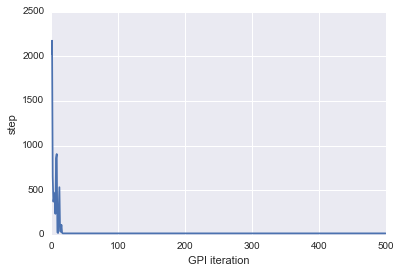

After 50 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^-
^--------
^<<<vv---
^^^<<<<--

After 100 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^<
^--------
^<<<<<<<-
^^^<<<<--

After 150 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^--------
^<<<<<<<<
^^^<<<<>^

After 200 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^--------
^<<<<<<<<
^^^<<<<>^

After 250 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^-------^
^<<<<<<<^
^^^<<<<>^

After 300 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^-------^
^<<<<<<<^
^^^<<<<<^

After 350 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^-------^
^<<<<<<<^
^^^<<<<<^

After 400 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^-------^
^<<<<<<>^
^^^<<<<<^

After 450 th iteration (minimum step => 16)
>>>>>>>>G
>>>^^^^^^
>^^^^^^^^
^-------^
^<<<<<<>^
^^^<<<<>^

After 500 th iteration (minimum step => 16)
>>>>>>>>G
>>

In [15]:
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

# SarsaLambda

minimum step => 20


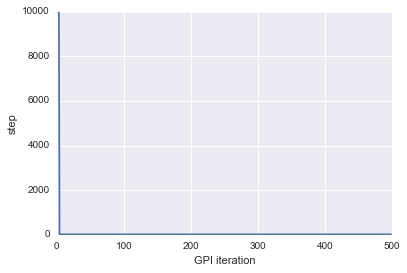

After 50 th iteration (minimum step => 20)
<vv>>v<<G
v>>^^v<>^
>>^^>>>^^
^--------
^<<v^v<^<
^<<<^<>^-

After 100 th iteration (minimum step => 20)
<vv>>v<<G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 150 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 200 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 250 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 300 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 350 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 400 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 450 th iteration (minimum step => 20)
<vv>>v<>G
v>>^^v<>^
>>^^>>>^^
^--------
^v<v^v<^<
^<<<^<>^-

After 500 th iteration (minimum step => 20)
<vv>>v<>G
v>

In [16]:
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 10


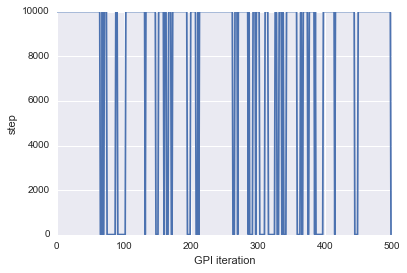

After 50 th iteration (minimum step => 10000)
v^>>v>vvG
>vv>>>>>^
v>>^v<>>^
^--------
^^>><^<<^
vv^^^vv^>

After 100 th iteration (minimum step => 10)
v^>>v>vvG
>>v>>>>>^
>>>^v<>>^
v-------^
>^^>>>>>^
vv^^>^^^^

After 150 th iteration (minimum step => 10)
v^>>v>vvG
vvv>>>>>^
>>>^^<>>^
v-------^
v<>>>v>>^
>>^<^>>^^

After 200 th iteration (minimum step => 10)
v^>>v>vvG
vv>>>>>>^
^>>^^<>>^
v-------^
^><v<<>>^
>><>>>>^^

After 250 th iteration (minimum step => 10)
v<>v^>vvG
^>>>>>>>^
>>>^^<>>^
v-------^
^v>^<^^v>
>v^<<<^^>

After 300 th iteration (minimum step => 10)
v<>v^>vvG
^^v>>>>>^
>>>^^<>>^
^-------^
><v>>>>>^
<>^v^^<^^

After 350 th iteration (minimum step => 10)
v<>v^>vvG
^^v>>>>>^
>>>^^<>>^
>-------^
>v><>>>>^
>>>>v><^^

After 400 th iteration (minimum step => 10)
v>>v^>vvG
v<^>>>>>^
^<<^^<>>^
v-------^
<v><v>>>^
v<><>^<^^

After 450 th iteration (minimum step => 10)
>>>>v>vvG
^<<<>>>>^
v<<>^<>>^
v-------^
>><^>>>>^
^<<>>^<^^

After 500 th iteration (minimum step => 10)
v<>>v>vvG

In [17]:
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


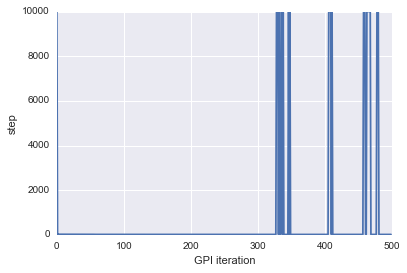

After 50 th iteration (minimum step => 18)
>>>v>>v>G
^v^>^>>^^
^>^>>^<^<
^--------
^<<>v<>>v
^^^<<<<v<

After 100 th iteration (minimum step => 18)
>>>>>>v>G
^v^>^>>^^
^>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 150 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
^>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 200 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
^>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 250 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
^>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 300 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
>>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 350 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
>>^>>^<^<
^--------
^<<>v<>>v
^^<<<<<v<

After 400 th iteration (minimum step => 16)
>>>>>>>>G
^v^>^>>^^
>>^>>^<^<
^--------
^<<>v<>>v
^<<<<<<v<

After 450 th iteration (minimum step => 16)
>>>>>>>>G
^v>>^>>>^
>>>>>^<^<
^--------
^<<>v<>>v
^^^<<<<v<

After 500 th iteration (minimum step => 16)
>>>>>>>>G
^v

In [22]:
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 10


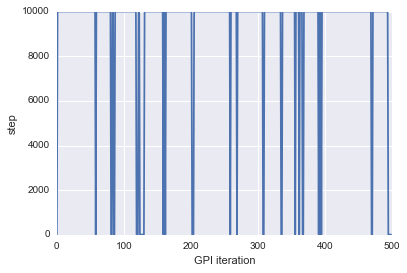

After 50 th iteration (minimum step => 18)
v^v>>>>>G
v>>^>^^>^
^<<^>^>^^
^--------
^<vv><<v>
>^><vvv<<

After 100 th iteration (minimum step => 10)
<<v>>>>>G
v<>^^^>>^
>v<^<>>v^
v-------<
>vv>v<>^>
<>>>><vv^

After 150 th iteration (minimum step => 10)
v<v>>>>>G
v<v^^^^>^
v>>^<>>^^
^-------^
<<<vvv>>^
>><<>>^^>

After 200 th iteration (minimum step => 10)
^>>vv^>>G
>^v>>>^>^
><<^<^>^^
<-------^
>><v<v<>>
>vv>>>>^v

After 250 th iteration (minimum step => 10)
^vvvv^>>G
<>>v>>^>^
>^>v>>>^^
>-------^
^^>vv<v>>
^<<<v^^^>

After 300 th iteration (minimum step => 10)
^<v^^>>>G
vvv<>>>>^
>^<^>^>^^
>-------^
><^<v>>>^
><>v>^v^<

After 350 th iteration (minimum step => 10)
^^v^>>>>G
<>v^>>^>^
<<^^<^>^^
v-------^
>^<>><>>^
^<^<>>v<^

After 400 th iteration (minimum step => 10)
^v<^>>>>G
^vv^<^^^^
^<>^<^>^^
v-------^
<<v^>^v>>
<>vv<><v>

After 450 th iteration (minimum step => 10000)
<>>^>>>>G
<v<^^^^^^
v<<<vv<^^
^-------^
<>>v<<<>^
<<^>>><^>

After 500 th iteration (minimum step => 10)
><vv>>>>G

In [23]:
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

# QLambda

minimum step => 16


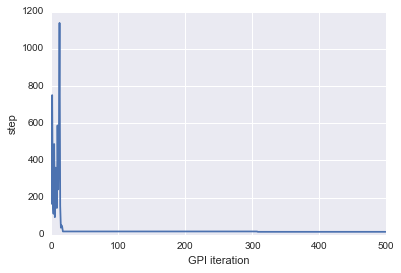

After 50 th iteration (minimum step => 18)
->>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<v------
^<<<<----

After 100 th iteration (minimum step => 18)
>>>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<v------
^<<<<----

After 150 th iteration (minimum step => 18)
>>>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<v------
^<<<<----

After 200 th iteration (minimum step => 18)
>>>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<vv-----
^<<<<----

After 250 th iteration (minimum step => 18)
>>>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<vv<----
^<<<<----

After 300 th iteration (minimum step => 18)
>>>>>v>>G
>>^>^>>^^
^>^-->^^^
^--------
^<vv<----
^<<<<----

After 350 th iteration (minimum step => 16)
>>>>>>>>G
>>^>^>>^^
^>^-->^^^
^--------
^<vv<----
^<<<<----

After 400 th iteration (minimum step => 16)
>>>>>>>>G
>>^>^>>^^
^>^-->^^^
^--------
^<vv<----
^<<<<----

After 450 th iteration (minimum step => 16)
>>>>>>>>G
>>^>^>>^^
^>^^->^^^
^--------
^<vv<----
^<<<<----

After 500 th iteration (minimum step => 16)
>>>>>>>>G
>>

In [18]:
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


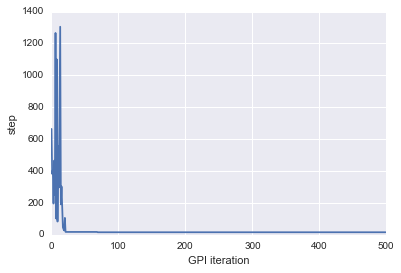

After 50 th iteration (minimum step => 18)
>>>vv>>>G
^>vvv>^>^
>^>>>^^<^
^--------
^v<<-----
^<<<<----

After 100 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^--------
^v<<-----
^<<<<----

After 150 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^--------
^v<<v----
^<<<<<---

After 200 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^--------
^<<<<v---
^<<<<<---

After 250 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^-------^
^<<<<v---
^<<<<<---

After 300 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^-------^
^<<<<v---
^<<<<<---

After 350 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^-------^
^<<<<v<--
^<<<<<---

After 400 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^-------^
^<<<<v<--
^<<<<<---

After 450 th iteration (minimum step => 16)
>>>vv>>>G
^>vvv>^>^
>>>>>^^<^
^-------^
^<<<<v<--
^<<<<<---

After 500 th iteration (minimum step => 16)
>>>vv>>>G
^>

In [19]:
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)

minimum step => 16


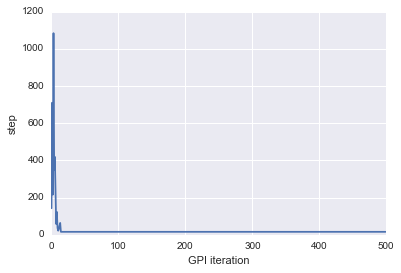

After 50 th iteration (minimum step => 16)
>>vvv>>>G
>>>>>>>>^
>>>>>^^^^
^--------
^<<<<<v<<
^<>^<<<<<

After 100 th iteration (minimum step => 16)
>>vv>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<v
^<<^<<<<<

After 150 th iteration (minimum step => 16)
>>v>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<v
^<<^<<<<<

After 200 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<<

After 250 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<<

After 300 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<<

After 350 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<^

After 400 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<^

After 450 th iteration (minimum step => 16)
>>>>>>>>G
>>>>>>>>^
>>>>>^^^^
^-------^
^<<<<<<<^
^<<^<<<<^

After 500 th iteration (minimum step => 16)
>>>>>>>>G
>>

In [20]:
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=50)